# ETL imports and data loading.

import libraries


In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import seaborn as sns
import sympy as sp
import logging
from functools import reduce
#import data_gen_functions as dgf
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
import sys
import data.income_prediction_files.functions as generativeFN
from functools import reduce
import operator
from itertools import chain
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import KFold
from statsmodels.regression.process_regression import ProcessMLE

from module_func.custom_mdls.functions_plots import display_factorial_planes, display_scree_plot, display_circles
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA

**Graphics settings!**

In [2]:
height, aspect = (8, 2)
rc={'figure.figsize': (20, 18)}
sns.set_style("whitegrid",  {"xtick.major.size": 8, "ytick.major.size": 8, height: height, aspect: aspect})
sns.set_context(font_scale=4, rc=rc)

### Data loading!

In [3]:
df_income_dist = pd.read_csv("./data/income_prediction_files/data/wiid.csv", thousands=".", decimal=",", usecols=["country", "quantile", "income", "gdpppp"])
df_gini = pd.read_csv("./data/income_prediction_files/data/API_SI.POV.GINI_DS2_en_csv.csv")
df_pop = pd.read_csv("./data/income_prediction_files/data/API_SP.POP.TOTL_DS2_en_csv.csv")

**Using the generative function from the given protocol to generate the gini countries and the income distribution with the mean income.**

In [4]:
df_gini_country = generativeFN.load_gini("./data/income_prediction_files/data/API_SI.POV.GINI_DS2_en_csv.csv")
df_income_dist = generativeFN.compute_mean_income(df_income_dist)

# Preliminary analysis.

#### Year(s) of data.

Checking all columns from gini data to see what kind of numerical and categorical data there is:

The values data are years columns that are only numerical.


Checking all columns from gini data to see what kind of numerical and categorical data there is:

The values data are years columns; this is only numerical here.


In [5]:
df_gini.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

Checking all columns from population data to see what kind of numerical and categorical data there is:

The values data are income gdpppp and the generated mj mean income. This is only numerical here.


In [6]:
df_pop.iloc[:, 4:].columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

Checking all columns from income_dist data to see what kind of numerical and categorical data there is:

The values data are income gdpppp and the generated mj mean income. This is only numerical here.

In [7]:
df_income_dist.columns

Index(['country', 'quantile', 'income', 'gdpppp', 'mj'], dtype='object')

**Amount of years**

In [8]:
int(df_pop.iloc[:, 4:].columns[-2]) - int( df_pop.iloc[:, 4:].columns.min())

57

**So there is an amount of 58 years from 1960 until 2018.**

#### Number of countries involved 115

There is more country code in the other data sets, 264 names and code, but they are zone and income classes.

In [9]:
df_income_dist.country.unique()

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'LAO', 'LBR', 'LKA', 'LTU', 'LUX',
       'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE', 'MNG',
       'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD', 'NOR',
       'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'ROU',
       'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ', 'SYR',
       'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR', 'URY',
       'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD'], dtype=object)

In [10]:
len(df_income_dist.country.unique())

115

In [11]:
len(df_gini["Country Name"].unique())

264

In [12]:
len(df_pop["Country Code"].unique())

264

**Some values in the df_pop are not single countries but zones or groups of countries, so they can't be used for the country calculation.**


In [13]:
not_country =  ['Africa Eastern and Southern',
 'Africa Western and Central', 'Arab World', 'Central African Republic',
 'Central Europe and the Baltics', 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)', 'Least developed countries: UN classification', 'Micronesia, Fed. Sts.',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Middle income', 'Low & middle income',
 'Low income',
 'Lower middle income', 'North America',
 'North Macedonia',
 'Northern Mariana Islands', 'Not classified', 'Other small states',
 'Pacific island small states', 'Post-demographic dividend',
 'Pre-demographic dividend', 'South Asia',
 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income',  'Data from database: Population estimates and projections',
 'Last Updated: 05/12/2023', 'West Bank and Gaza',
 'World',
 'nan', 'Small states', 'High income', 'Caribbean small states',]
len(list(filter(lambda s:  s not in not_country, df_pop["Country Name"].unique())))

219

Make sure that there are no regions in our data set; these regions are in the data web platform, so I am checking if they are in the population data set.


In [14]:
regions = ['Europe & Central Asia', 'Latin America & Caribbean',
       'Sub-Saharan Africa', 'South Asia', 'North America',
       'East Asia & Pacific', 'Middle East & North Africa', np.NaN]

In [15]:
# A list of Zones values on the country name that is not the country name is filtered here.
list(filter(lambda s:  s in not_country, df_pop["Country Name"].unique()))

['Arab World',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Caribbean small states',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia',
 'Euro area',
 'European Union',
 'Fragile and conflict affected situations',
 'Micronesia, Fed. Sts.',
 'High income',
 'Heavily indebted poor countries (HIPC)',
 'Not classified',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean',
 'Least developed countries: UN classification',
 'Low income',
 'Lower middle income',
 'Low & middle income',
 'Late-demographic dividend',
 'Middle East & North Africa',
 'Middle income',
 'Middle East & North Africa (excluding high income)',
 'Northern Mariana Islands',
 'North America',
 'Other small states',
 'Pre-demographic dividend',
 'West Bank and Gaza',
 'Pacific island small states',
 'Post-demographic dividend',
 'South Asia',
 'Su

There should be 118, according to the research papers, but there may be some regions counted as countries.


#### Population covered by the dataset (percentage of world population)


Here, I have to answer how much percentage of the world population my 116 countries cover.

Because we identify some regions and zones, the best way to calculate the population percentages will be to use the world zone. 

In [16]:
df_pop.iloc[:, 4:].max().min() # What is the minimal country pop


3034193297.0

In [17]:
df_pop.iloc[:, 4:].sum().max() # What is the maximal country pop

78835762094.0

In [18]:
df_pop[df_pop["Country Name"] == "World"] # What is the world total in all years of country pop


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
257,World,WLD,"Population, total",SP.POP.TOTL,3.034193e+09,3.075115e+09,3.127961e+09,3.192794e+09,3.258201e+09,3.324952e+09,...,6.847215e+09,6.930657e+09,7.012844e+09,7.097401e+09,7.182860e+09,7.268986e+09,7.355220e+09,7.442136e+09,NaN,NaN


**Population calculation by selecting a single year from the data set.**

In [19]:
df_pop["pop_percentage"] = (df_pop[df_pop["Country Code"].isin(df_gini_country.index)]["2016"] / df_pop[df_pop["Country Code"].isin(df_gini_country.index)]["2016"].sum())
df_pop["pop_percentage"]

0           NaN
1           NaN
2      0.003988
3      0.000398
4           NaN
         ...   
259    0.000251
260    0.003818
261    0.007738
262    0.002296
263    0.002235
Name: pop_percentage, Length: 264, dtype: float64

**The percentage calculation from the year 2016 = 0.97%.**

In [20]:
df_pop[df_pop["Country Code"].isin(df_gini_country.index)]["2016"].sum() / df_pop[df_pop["Country Name"] == "World"]["2016"]

257    0.970794
Name: 2016, dtype: float64

In [21]:
df_pop.groupby(by="Country Name")["pop_percentage"].sum().to_frame() # All the countries' percentages


,pop_percentage
Country Name,
Afghanistan,0.000000
Albania,0.000398
Algeria,0.005620
American Samoa,0.000000
Andorra,0.000000
...,...
West Bank and Gaza,0.000630
World,0.000000
"Yemen, Rep.",0.003818


In [22]:
df_pop["pop_percentage"].sum() ## the total percent sum.


0.9999999999999999

#### The type of quantiles used (quartiles, deciles, ventiles, percentiles, etc.)


In [23]:
# check if deciles would be better in a plot. Try more ways to divide it.
income_groups = list(filter(lambda s: s.endswith("income"), not_country))
income_groups

['Middle income',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Upper middle income',
 'High income']

In [24]:
df_income_dist["quantile"].value_counts() # quartiles or percentiles are the most appropriate here, but I need to check more about them.

95    115
90    115
10    115
18    115
26    115
     ... 
45    115
53    115
61    115
69    115
8     115
Name: quantile, Length: 100, dtype: int64

In [25]:
# check if deciles would be better in a plot. Try more ways to divide it.
df_pop[df_pop["Country Name"].isin(income_groups)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,pop_percentage
93,High income,HIC,"Population, total",SP.POP.TOTL,7.546094e+08,7.659549e+08,7.759514e+08,7.858621e+08,7.956652e+08,8.050752e+08,...,1.149512e+09,1.154999e+09,1.161900e+09,1.168844e+09,1.175967e+09,1.182930e+09,1.190029e+09,NaN,NaN,NaN
134,Low income,LIC,"Population, total",SP.POP.TOTL,1.546702e+08,1.580693e+08,1.615497e+08,1.651514e+08,1.689315e+08,1.729300e+08,...,5.600074e+08,5.755725e+08,5.915762e+08,6.079874e+08,6.247599e+08,6.418586e+08,6.592727e+08,NaN,NaN,NaN
137,Lower middle income,LMC,"Population, total",SP.POP.TOTL,9.555304e+08,9.771532e+08,9.995103e+08,1.022440e+09,1.046223e+09,1.070588e+09,...,2.756603e+09,2.799384e+09,2.841935e+09,2.884574e+09,2.927194e+09,2.970020e+09,3.012924e+09,NaN,NaN,NaN
138,Low & middle income,LMY,"Population, total",SP.POP.TOTL,2.279584e+09,2.309160e+09,2.352010e+09,2.406932e+09,2.462536e+09,2.519876e+09,...,5.781145e+09,5.857845e+09,5.935501e+09,6.014016e+09,6.093020e+09,6.172291e+09,6.252106e+09,NaN,NaN,NaN
154,Middle income,MIC,"Population, total",SP.POP.TOTL,2.124914e+09,2.151091e+09,2.190460e+09,2.241781e+09,2.293605e+09,2.346946e+09,...,5.221138e+09,5.282272e+09,5.343924e+09,5.406029e+09,5.468260e+09,5.530432e+09,5.592833e+09,NaN,NaN,NaN
247,Upper middle income,UMC,"Population, total",SP.POP.TOTL,1.169383e+09,1.173938e+09,1.190950e+09,1.219341e+09,1.247382e+09,1.276359e+09,...,2.464535e+09,2.482889e+09,2.501990e+09,2.521455e+09,2.541065e+09,2.560412e+09,2.579910e+09,NaN,NaN,NaN


In [26]:
df_income_dist["quantile"].value_counts()# quartiles or percentiles are the most appropriate here, but I need to check more about them.

95    115
90    115
10    115
18    115
26    115
     ... 
45    115
53    115
61    115
69    115
8     115
Name: quantile, Length: 100, dtype: int64

I am grouping all the quantiles in different range groups.


In [27]:
quartile_range = list( range(25, 125, 25))
decile_range = list( range(10, 110, 10))
ventile_range = list( range(20, 105, 20))
quartile_range

[25, 50, 75, 100]

**Checking if there is any difference in the quantile distribution!**

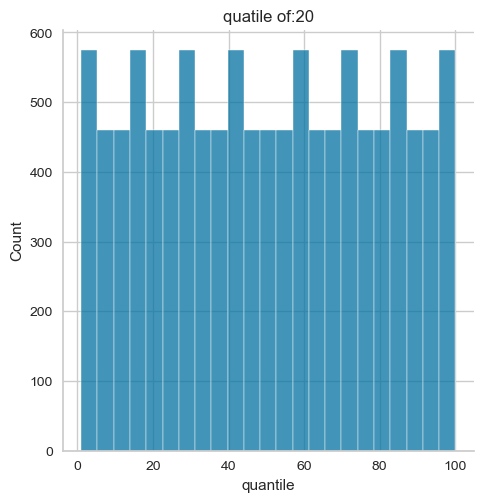

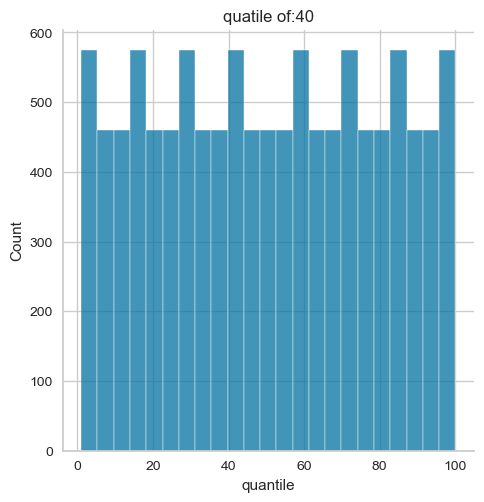

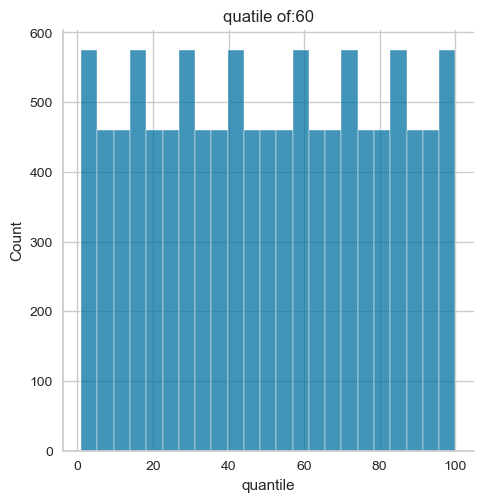

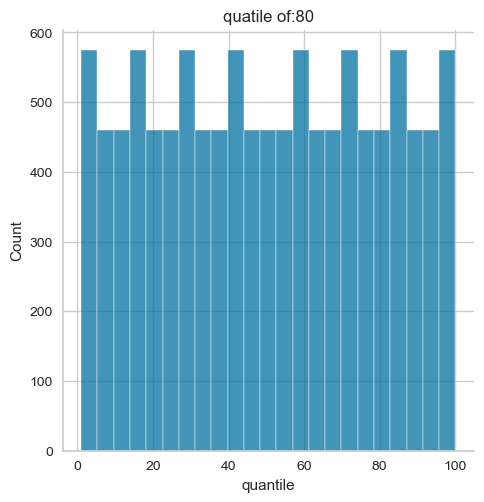

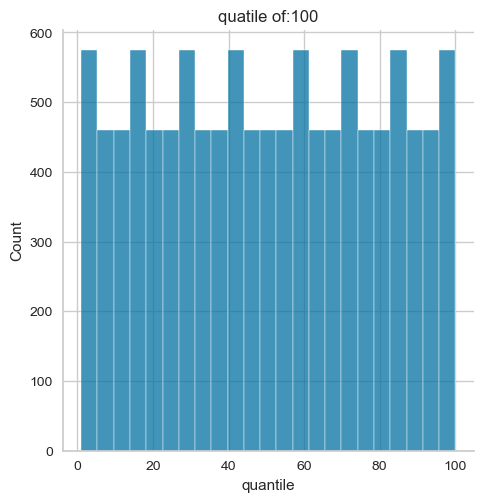

In [28]:
list(map(lambda q: sns.displot(data=df_income_dist["quantile"]).set(title="quatile of:{}".format(q)), ventile_range))

All quantile distributions look the same, so here I am choosing the 20 quantile as the best.


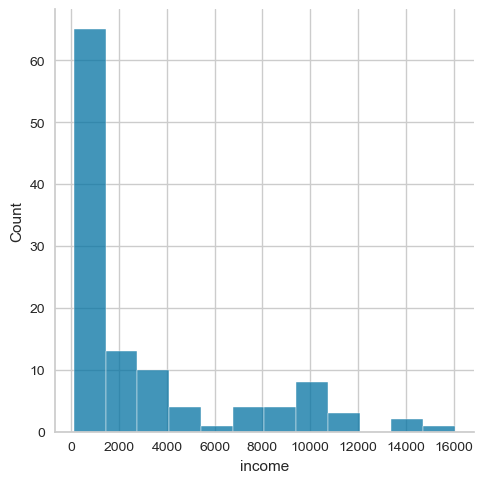

In [29]:
sns.displot(df_income_dist[df_income_dist["quantile"] == 20].income)

In [30]:
df_income_dist[df_income_dist["quantile"] == 20]

,country,quantile,income,gdpppp,mj
19,ALB,20,1669.91360,7297.00000,2994.829902
119,ARG,20,1974.46220,13220.00000,5847.884654
219,ARM,20,985.93840,5611.00000,1628.382785
319,AUT,20,9695.09900,36193.00000,16637.600204
419,AZE,20,1289.62820,8101.00000,2357.429023
...,...,...,...,...,...
11019,VNM,20,623.73840,2578.00000,1377.773966
11119,PSE,20,536.21150,NaN,1114.098514
11219,YEM,20,495.60764,2224.00000,1042.635870
11319,ZAF,20,749.16760,9602.00000,5617.904880


There are some differences in the distribution from every percentile. If the data is separated by ventilates, I can see an increase in income but maintain more detail close to the percentile distribution.

This is also confirmed by the research paper on page 12.

**As the difference in distribution is due to the percentiles, the only reason to divide the percentile in a specific way comes from the paper itself; on pages 31-41, we see how ventiles are most used. Therefore, ventiles will be used here!**

#### The $PPP unity and an explanation of why (not why not) is an excellent method to compare countries.

**The purchasing power parity is a theory that describes the equilibrium exchange rate between 2 countries.**

When someone buys a product in Brazil and asks himself how much would the same product cost in the USA or perhaps with the current exchange rate, how much is my purchase power in the USA? Can I buy more than one or less of the same goods and services? 

What does this mean?

Let's take one key product with a constant cost in many different countries, like the Big Mac!

Now, asking the question! 

How much will a BigMac in Brazil cost in Brazilian Reals compared to one in US Dollars in dollars?

Then, we will need to check the current price of both BigMac and come up with a simple equation like the one below.

In [31]:
x, y, z = sp.symbols("CostOfGood_X, CostOfGood_Y, $PPP")
exp = sp.Eq(z, x / y)
exp

Eq($PPP, CostOfGood_X/CostOfGood_Y)

PPP = BigMac_Brazil / BigMac_USA = ?.

Currently, a BigMac in Brazil costs something like RS 22.90, and in the USA  $US 5.36.

By taking the US$ as the base currency and calculating these values with our up equation, we get a value close to $US 4.27

In [32]:
exp.subs({x: 22.90, y: 5.36})

Eq($PPP, 4.27238805970149)

Why is the PPP useful?

For comparing the standard of living in different countries, it represents the total number of goods and services that can be purchased with a given currency.

Another advance is that because the price of these base products isn't volatile but stable, the ppp can be used for calculating some other important Macro statistics like the GDP mitigating inflation.

#### A graph showing how diverse countries are in terms of income distribution. This graph must represent the income (y-axis, on a log scale) as a function of income class (x-axis) for 5 to 10 countries. Please ensure you represent a diversity of cases. Among the countries that must be present are your own country and the two countries with the greatest and lowest Gini index.

Select the other countries with sample function, and consider min, max, and my country all need to be based on avg_gini_index values.

In [33]:
regions

['Europe & Central Asia',
 'Latin America & Caribbean',
 'Sub-Saharan Africa',
 'South Asia',
 'North America',
 'East Asia & Pacific',
 'Middle East & North Africa',
 nan]

In [34]:
df_pop[df_pop["Country Name"].isin(regions)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,pop_percentage
61,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.042017e+09,1.045308e+09,1.059467e+09,1.084916e+09,1.109997e+09,1.136132e+09,...,2.205615e+09,2.220358e+09,2.235430e+09,2.250552e+09,2.265898e+09,2.281203e+09,2.296786e+09,NaN,NaN,NaN
63,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,6.672464e+08,6.749730e+08,6.829387e+08,6.909627e+08,6.989057e+08,7.066090e+08,...,8.890162e+08,8.910950e+08,8.946667e+08,8.988551e+08,9.030947e+08,9.074248e+08,9.119953e+08,NaN,NaN,NaN
132,Latin America & Caribbean,LCN,"Population, total",SP.POP.TOTL,2.204342e+08,2.265643e+08,2.328986e+08,2.394002e+08,2.460169e+08,2.527108e+08,...,5.964778e+08,6.035346e+08,6.105450e+08,6.174924e+08,6.243318e+08,6.310585e+08,6.376645e+08,NaN,NaN,NaN
151,Middle East & North Africa,MEA,"Population, total",SP.POP.TOTL,1.054887e+08,1.083742e+08,1.113859e+08,1.144714e+08,1.176716e+08,1.209736e+08,...,3.883761e+08,3.965732e+08,4.047824e+08,4.129504e+08,4.210228e+08,4.289617e+08,4.367207e+08,NaN,NaN,NaN
168,North America,NAC,"Population, total",SP.POP.TOTL,1.986244e+08,2.020075e+08,2.051986e+08,2.082537e+08,2.112629e+08,2.140311e+08,...,3.434186e+08,3.460707e+08,3.488137e+08,3.514254e+08,3.541732e+08,3.568105e+08,3.594793e+08,NaN,NaN,NaN
202,South Asia,SAS,"Population, total",SP.POP.TOTL,5.718572e+08,5.839504e+08,5.965048e+08,6.093763e+08,6.228756e+08,6.367550e+08,...,1.630730e+09,1.653756e+09,1.676614e+09,1.699306e+09,1.721841e+09,1.744191e+09,1.766383e+09,NaN,NaN,NaN
215,Sub-Saharan Africa,SSF,"Population, total",SP.POP.TOTL,2.285255e+08,2.339380e+08,2.395679e+08,2.454139e+08,2.514716e+08,2.577403e+08,...,8.770231e+08,9.014558e+08,9.265482e+08,9.522786e+08,9.786251e+08,1.005571e+09,1.033106e+09,NaN,NaN,NaN


**Here I am selecting the countries based on min and max, my birth country all based on its Gini index, and others random ones based on their means values**

In [35]:
top_country_gini_max =  df_gini.groupby(by="Country Name").max().sort_values(by="2010", ascending=False)["Country Code"].head(1)[0]
top_country_gini_min =  df_gini.groupby(by="Country Name").min().sort_values(by="2010")["Country Code"].head(1)[0]
my_country =  df_gini[df_gini["Country Name"] == "Brazil"].groupby(by="Country Name").max()["Country Code"][0]
# random state of 6 give the most divierse countries but they values are minimals compare to the min, max and my country.
top_country_gini_avg =  df_income_dist.sample(7, random_state=6).groupby(by="country").mean(numeric_only= True).index.to_list()
selected_countries = [top_country_gini_max, top_country_gini_min, my_country]
selected_countries_code = list(chain(selected_countries, top_country_gini_avg))
selected_countries = df_income_dist[df_income_dist["country"].isin(selected_countries_code)]

### Ploting and the countries' quantile income from the selected countries.

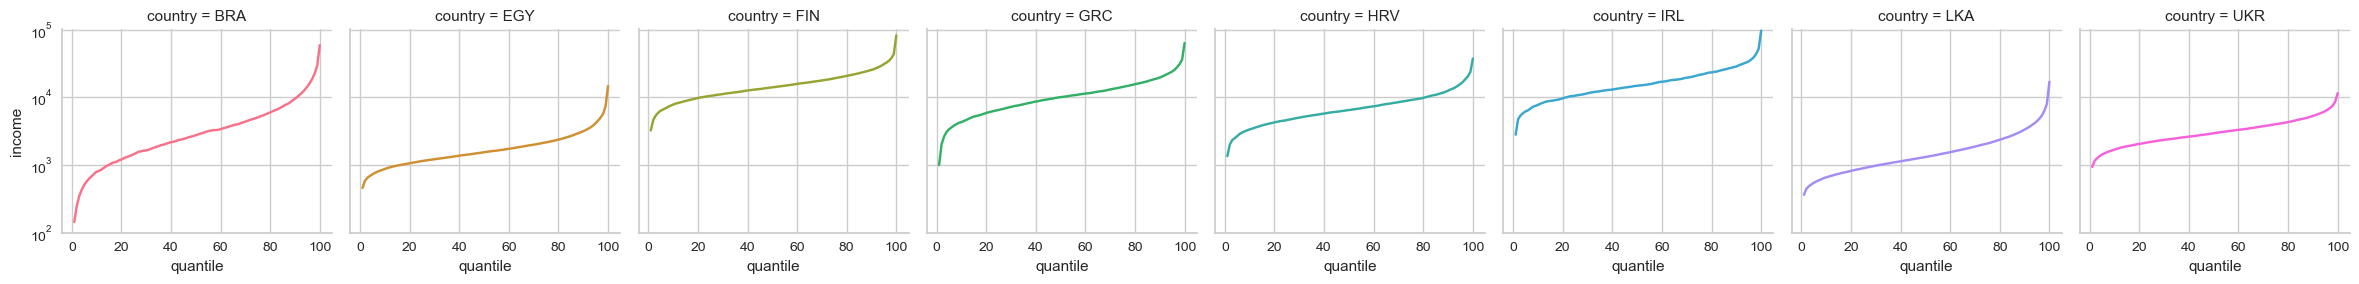

In [36]:
g = sns.FacetGrid(selected_countries, col="country", hue="country")
g.map(sns.lineplot,  "quantile", "income", )
plt.yscale("symlog")
plt.ylim(100)
plt.show()


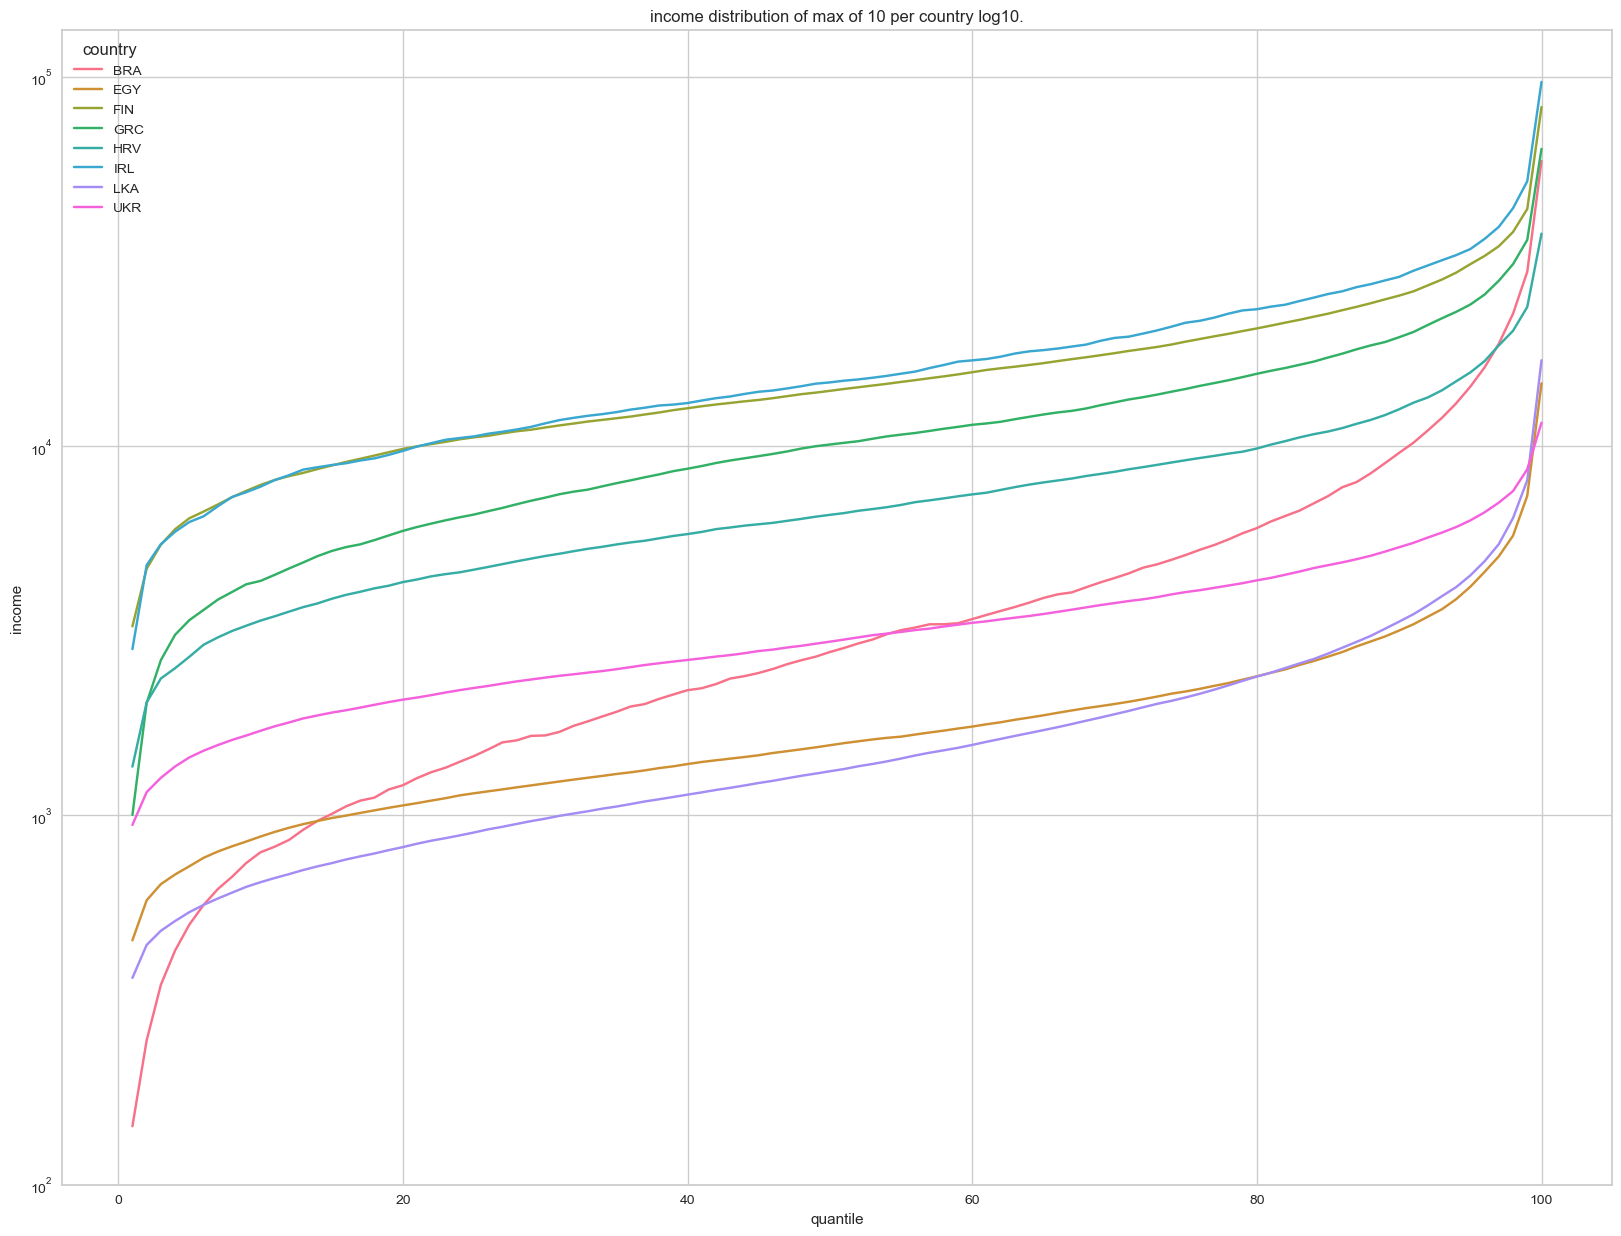

In [37]:
plt.figure(figsize=(20, 15))
sns.lineplot(x="quantile",  y="income", data=selected_countries, hue="country").set(title = "income distribution of max of 10 per country log10.")
plt.yscale("symlog")
plt.ylim(100)
plt.show()


### The income distribution of the selected countries in a bar chart.


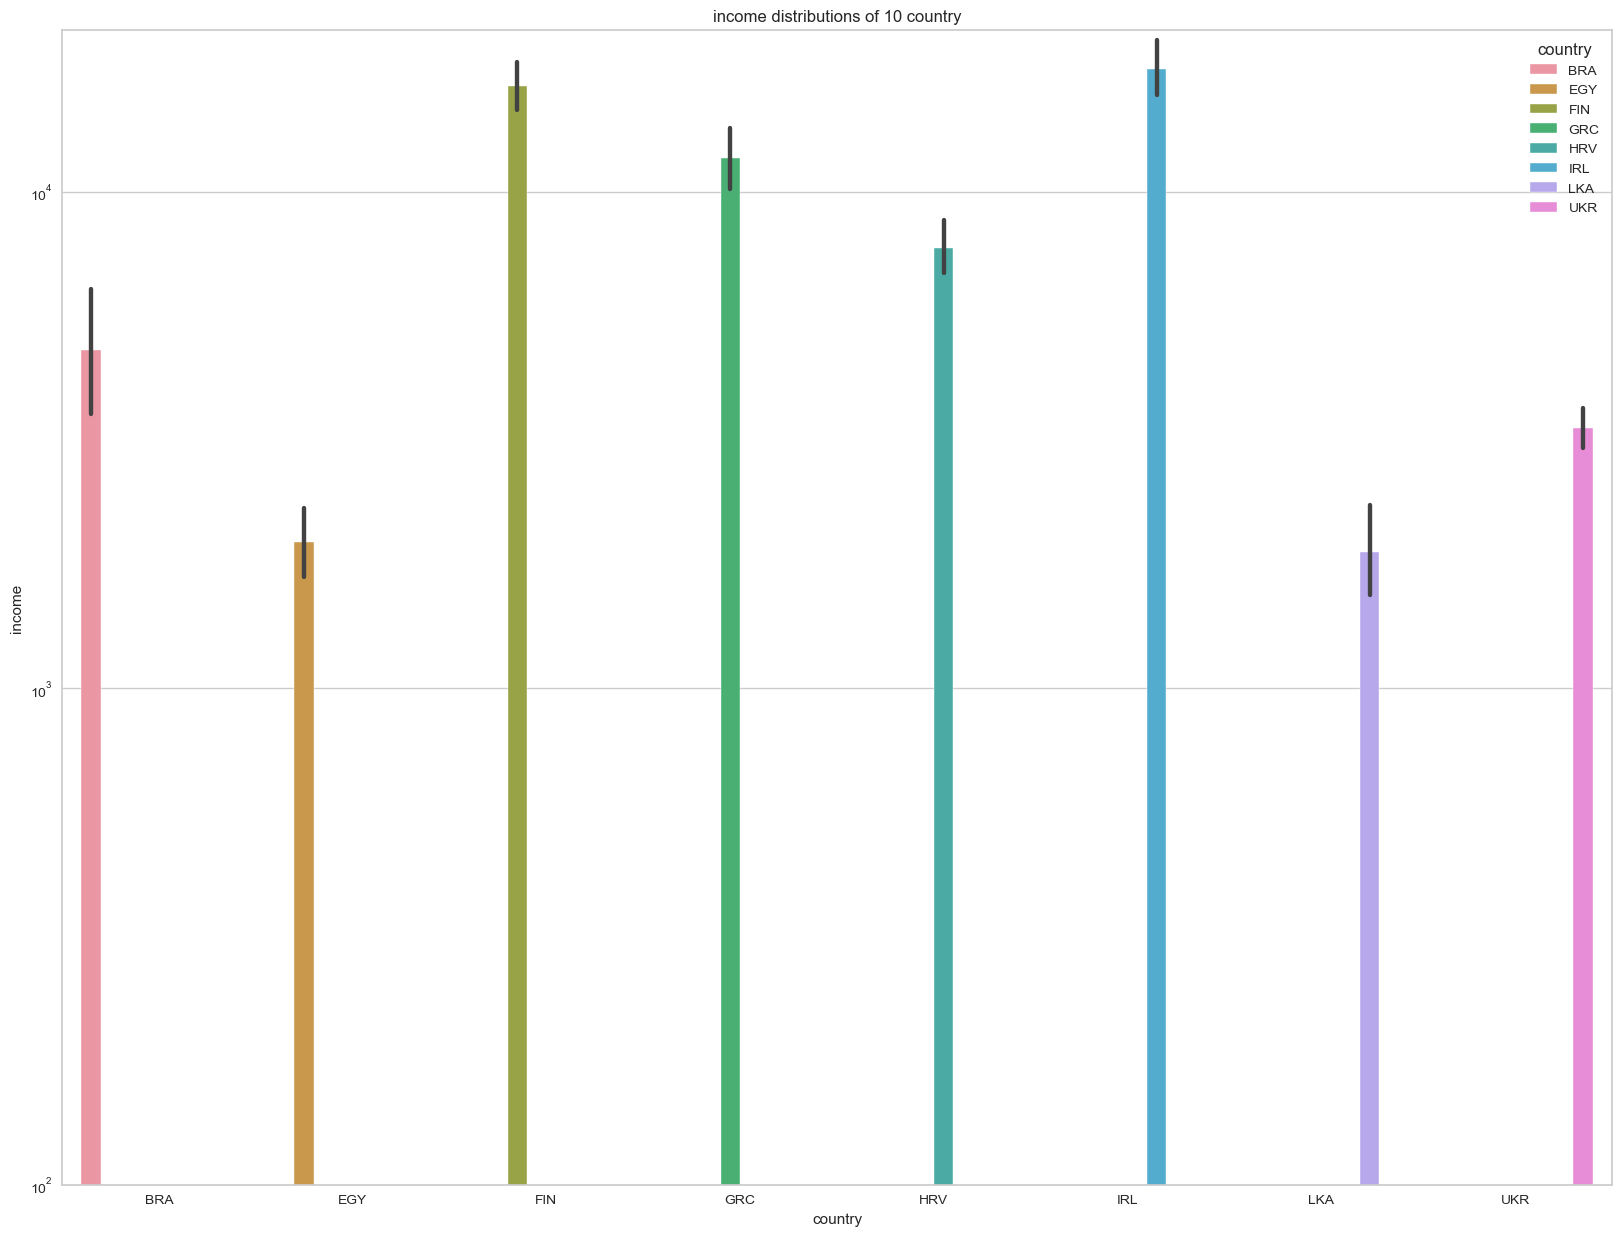

In [38]:
plt.figure(figsize=(20, 15))
chart = sns.barplot(x="country",  y="income", data=selected_countries, hue="country", ).set(title = "income distributions of 10 country")
plt.yscale("symlog")
plt.ylim(100)
plt.show()

#### The Lorenz curve for these countries.


In [39]:
# Defining the gini function.
def calc_gini(data_values):
    count = data_values.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * data_values).sum()
    total = data_values.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant


# Defining the Lorenz function.
def cal_lorenz_curve(arr):
    scale_prefix_sum = arr.cumsum() / arr.sum()
    return np.insert(scale_prefix_sum, 0, 0)

# Rendering Lorenz curve
def plot_lorenz_curves(data):
    curves = list(map(lambda code: cal_lorenz_curve(selected_countries[selected_countries["country"] == code[1]]["income"].values), enumerate(selected_countries_code[1:])))
    ginis = list(map(lambda code: calc_gini(selected_countries[selected_countries["country"] == code[1]]["income"].values), enumerate(selected_countries_code[1:])))
    
    sns.lineplot(data = curves)
    sns.lineplot(data = np.linspace(0.0, 1.0, 101),color="black")
    
    plt.legend(selected_countries_code)
    title = "Lorenz curve of income with a gini value of: \n country: {country} value = {gini}".format(country= selected_countries_code[np.argmax(ginis)], gini = np.max(ginis))
    plt.title(title, fontdict={'size': 18,})


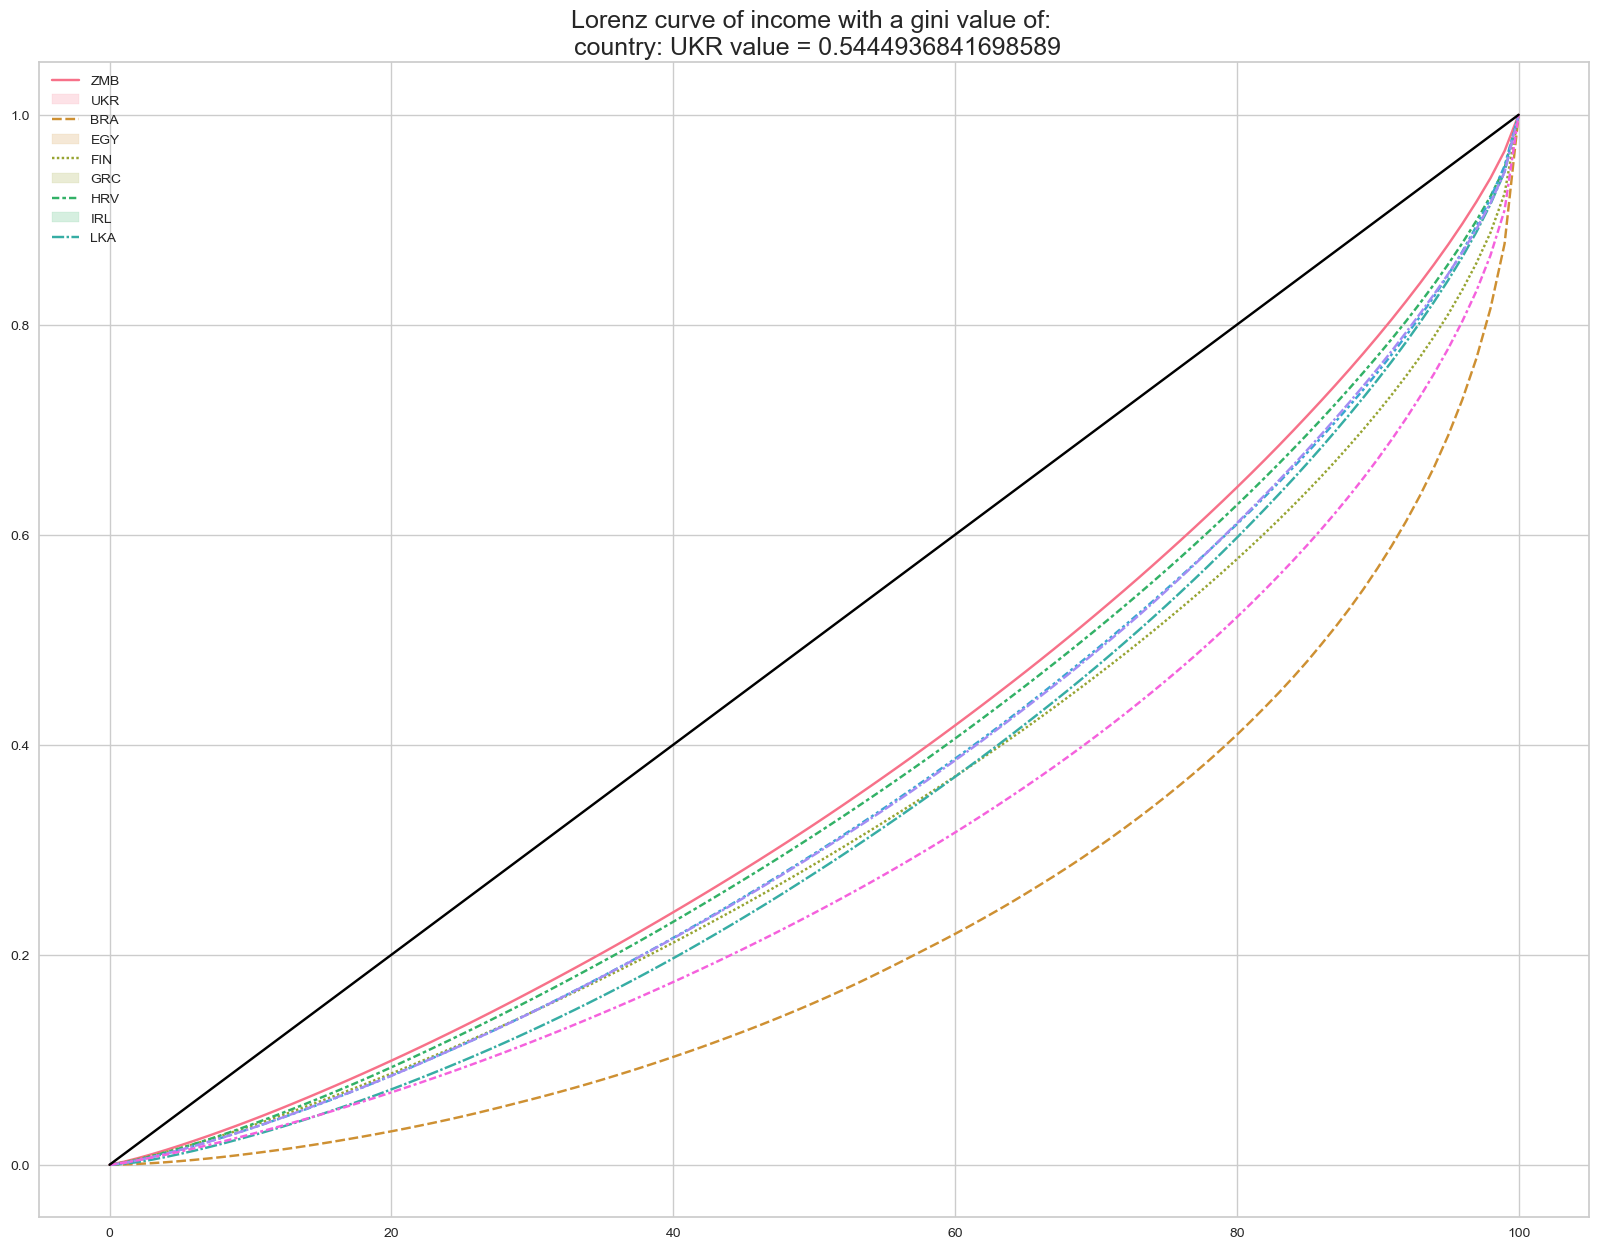

In [40]:
plt.figure(figsize=(20, 15))

plot_lorenz_curves(selected_countries)

## Task 2

**Creating a copy of the distribution income data set and matching the quantile name as in the research paper.**

In [41]:
df_sample = df_income_dist.copy()
df_sample.rename( columns={"quantile": "c_i_child"}, inplace=True)

**Generating the final data set that will be used in the final model.**

In [42]:
generated_sample = generativeFN.generate_clones(df_sample, 499)
generated_sample

,country,c_i_child,income,gdpppp,mj,c_i_parent
0,ALB,1,728.89795,7297.0,2994.829902,NaN
1,ALB,1,728.89795,7297.0,2994.829902,NaN
2,ALB,1,728.89795,7297.0,2994.829902,NaN
3,ALB,1,728.89795,7297.0,2994.829902,NaN
4,ALB,1,728.89795,7297.0,2994.829902,NaN
...,...,...,...,...,...,...
5749995,ZAF,100,82408.55000,9602.0,5617.904880,NaN
5749996,ZAF,100,82408.55000,9602.0,5617.904880,NaN
5749997,ZAF,100,82408.55000,9602.0,5617.904880,NaN
5749998,ZAF,100,82408.55000,9602.0,5617.904880,NaN


In [43]:
generated_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5750000 entries, 0 to 5749999
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   country     object 
 1   c_i_child   int64  
 2   income      float64
 3   gdpppp      float64
 4   mj          float64
 5   c_i_parent  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 263.2+ MB


In [44]:
country_elasticity = generativeFN.load_elasticities()
country_elasticity

,country_code,name,base_case,opti_case,pess_case
country_code,,,,,
AGO,AGO,Angola,0.66,0.50,0.9
BDI,BDI,Burundi,0.66,0.50,0.9
BEN,BEN,Benin,0.66,0.50,0.9
BFA,BFA,Burkina Faso,0.66,0.50,0.9
BWA,BWA,Botswana,0.66,0.50,0.9
...,...,...,...,...,...
SWE,SWE,Sweden,0.20,0.15,0.3
CAN,CAN,Canada,0.20,0.15,0.3
USA,USA,United States of America,0.40,0.30,0.5


In [45]:
cond_distr_matrices = generativeFN.get_cond_distr_matrices(country_elasticity, "base_case")
cond_distr_matrices

{0.66: array([[0.165, 0.084, 0.077, ..., 0.   , 0.   , 0.   ],
        [0.085, 0.067, 0.063, ..., 0.   , 0.   , 0.   ],
        [0.078, 0.053, 0.044, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.001, 0.   , ..., 0.046, 0.05 , 0.079],
        [0.   , 0.   , 0.   , ..., 0.043, 0.065, 0.093],
        [0.   , 0.   , 0.   , ..., 0.067, 0.11 , 0.164]]),
 0.5: array([[0.098, 0.059, 0.066, ..., 0.001, 0.   , 0.   ],
        [0.069, 0.047, 0.043, ..., 0.   , 0.   , 0.   ],
        [0.056, 0.035, 0.037, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.033, 0.041, 0.053],
        [0.   , 0.   , 0.   , ..., 0.043, 0.049, 0.06 ],
        [0.   , 0.   , 0.   , ..., 0.062, 0.055, 0.104]]),
 0.4: array([[0.075, 0.037, 0.043, ..., 0.   , 0.001, 0.001],
        [0.06 , 0.039, 0.035, ..., 0.002, 0.001, 0.001],
        [0.039, 0.041, 0.04 , ..., 0.   , 0.001, 0.001],
        ...,
        [0.   , 0.002, 0.   , ..., 0.035, 0.034, 0.041],
        [0.   , 0.001, 0.   ,

In [46]:
c_i_parent = generativeFN.add_c_i_parent(generated_sample, country_elasticity, cond_distr_matrices, 499, "base_case")
c_i_parent

,country,c_i_child,income,gdpppp,mj,c_i_parent
0,ALB,1,728.89795,7297.0,2994.829902,1.0
1,ALB,1,728.89795,7297.0,2994.829902,1.0
2,ALB,1,728.89795,7297.0,2994.829902,1.0
3,ALB,1,728.89795,7297.0,2994.829902,1.0
4,ALB,1,728.89795,7297.0,2994.829902,1.0
...,...,...,...,...,...,...
5749995,ZAF,100,82408.55000,9602.0,5617.904880,100.0
5749996,ZAF,100,82408.55000,9602.0,5617.904880,100.0
5749997,ZAF,100,82408.55000,9602.0,5617.904880,100.0
5749998,ZAF,100,82408.55000,9602.0,5617.904880,100.0


**Saving the generated data for Regression use later.**


In [47]:
df_model_data = c_i_parent.join(df_gini_country["gini"], on="country").copy()
df_model_data.dropna(inplace=True)

In [48]:
df_model_data.to_csv("./data/model_data.csv.gz", compression='gzip')

# Task 3

### Data model loading from CSV.


In [49]:
df_model_data = pd.read_csv("./data/model_data.csv.gz")

In [50]:
df_model_data.head()

,Unnamed: 0,country,c_i_child,income,gdpppp,mj,c_i_parent,gini
0,0,ALB,1,728.89795,7297.0,2994.829902,1.0,29.0
1,1,ALB,1,728.89795,7297.0,2994.829902,1.0,29.0
2,2,ALB,1,728.89795,7297.0,2994.829902,1.0,29.0
3,3,ALB,1,728.89795,7297.0,2994.829902,1.0,29.0
4,4,ALB,1,728.89795,7297.0,2994.829902,1.0,29.0


## An ANOVA with the individual's country as the only explanatory variable. 


Does the mean income change based on the country?


In [51]:
# Income is the dependent variable; this should vary based on the independent variables, in this case, country.
result_model_1 = smf.ols("income ~ C(country)", data=df_model_data).fit()
anova_table = sms.anova_lm(result_model_1, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(country),2.458329e+14,110.0,49217.464227,0.0
Residual,2.520068e+14,5549889.0,NaN,NaN


According to the results here, the country has a statistically significant effect on the dependent variable.

The F statistics indicate that there is something like 49% variation, but what is the difference in percentage between the dependent and the independent variables so the effects in between?

Here, I will run all the main numerical variables against income.

In [52]:
# selecting independent variables.
models = tuple(["C(country)", "mj", "gdpppp", "gini", "c_i_parent"])


In [53]:
def generateModels(model, df_data):
    result_model= smf.ols("income ~ " + model, data=df_data).fit()
    anova_table = sms.anova_lm(result_model, typ=2)
    return anova_table

Here, You see all models' statistics and how the F statistics change; there are not many changes in the P values.

In [54]:
anova_tables = list(map(lambda model: generateModels(model, df_model_data), models))
anova_tables

[                  sum_sq         df             F  PR(>F)
 C(country)  2.458329e+14      110.0  49217.464227     0.0
 Residual    2.520068e+14  5549889.0           NaN     NaN,
                 sum_sq         df             F  PR(>F)
 mj        2.458329e+14        1.0  5.414027e+06     0.0
 Residual  2.520068e+14  5549998.0           NaN     NaN,
                 sum_sq         df             F  PR(>F)
 gdpppp    2.218731e+14        1.0  4.462115e+06     0.0
 Residual  2.759666e+14  5549998.0           NaN     NaN,
                 sum_sq         df              F  PR(>F)
 gini      2.817201e+13        1.0  332904.721069     0.0
 Residual  4.696677e+14  5549998.0            NaN     NaN,
                   sum_sq         df              F  PR(>F)
 c_i_parent  1.287951e+13        1.0  147396.140931     0.0
 Residual    4.849602e+14  5549998.0            NaN     NaN]

Here are the models' ssEfects percentage and their Eta square ratio values.

Country and mean income "mj" are the ones that most influence on the income with 49.38%, gdpppp is the third one followed by gini but is quite low compared to the mentioned ones.

The Eta square also confirms these effects; the lower its values, the higher its influence on the dependent variable, in this case, the income.

In [55]:
list(map(lambda anova_table:  generativeFN.calc_anova_table_ETA_sq(anova_table), anova_tables))

[                 SStotal SSeffect        ETA_sq
 C(country)  4.978397e+14   49.38%  9.918840e-16
 Residual    4.978397e+14   50.62%  1.016795e-15,
                SStotal SSeffect        ETA_sq
 mj        4.978397e+14   49.38%  9.918840e-16
 Residual  4.978397e+14   50.62%  1.016795e-15,
                SStotal SSeffect        ETA_sq
 gdpppp    4.978397e+14   44.57%  8.952112e-16
 Residual  4.978397e+14   55.43%  1.113467e-15,
                SStotal SSeffect        ETA_sq
 gini      4.978397e+14    5.66%  1.136681e-16
 Residual  4.978397e+14   94.34%  1.895011e-15,
                  SStotal SSeffect        ETA_sq
 c_i_parent  4.978397e+14    2.59%  5.196612e-17
 Residual    4.978397e+14   97.41%  1.956713e-15]

**What if we have a more complex model? Does the mean income "mj" demise its influence?**

**Implementing evalutation functions**

In [56]:
def RMSE(resid):
    return np.sqrt(np.square(resid).sum()) / len(resid)

**Creating the Anova model**

Formulas

In [57]:
result_model_2 = smf.ols("income ~ mj + gini + c_i_parent", data=df_model_data).fit()
anova_table_2 = sms.anova_lm(result_model_2, typ=2)
anova_table_2

,sum_sq,df,F,PR(>F)
mj,2.176830e+14,1.0,5.053102e+06,0.000000
gini,1.460433e+06,1.0,3.390121e-02,0.853917
c_i_parent,1.291811e+13,1.0,2.998698e+05,0.000000
Residual,2.390887e+14,5549996.0,NaN,NaN


In [58]:
generativeFN.calc_anova_table_ETA_sq(anova_table_2)

,SStotal,SSeffect,ETA_sq
mj,4.696898e+14,46.35%,9.867388e-16
gini,4.696898e+14,0.00%,6.620020e-24
c_i_parent,4.696898e+14,2.75%,5.855673e-17
Residual,4.696898e+14,50.90%,1.083769e-15


In [59]:
result_model_3 = smf.ols("income ~ C(country) + mj + gini + c_i_parent + gdpppp", data=df_model_data).fit()
anova_table_3 = sms.anova_lm(result_model_3, typ=2)
anova_table_3

/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 110, but rank is 109
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(country),7.885811e+12,110.0,1664.097688,0.000000e+00
mj,1.026034e+13,1.0,238169.795333,0.000000e+00
gini,4.810122e+08,1.0,11.165578,8.332954e-04
c_i_parent,1.291811e+13,1.0,299863.956451,0.000000e+00
gdpppp,2.321168e+09,1.0,53.880500,2.130907e-13
Residual,2.390887e+14,5549888.0,NaN,NaN


In [60]:
generativeFN.calc_anova_table_ETA_sq(anova_table_3)

,SStotal,SSeffect,ETA_sq
C(country),2.701558e+14,2.92%,1.080483e-16
mj,2.701558e+14,3.80%,1.405831e-16
gini,2.701558e+14,0.00%,6.590639e-21
c_i_parent,2.701558e+14,4.78%,1.769989e-16
gdpppp,2.701558e+14,0.00%,3.180372e-20
Residual,2.701558e+14,88.50%,3.275899e-15


As a result, the mean income, parent income, and country have the most influence on the dependent variable income.

**The ANOVA model suggests that there is a significant variation in the income variable within different countries' mean income and parent income!**

The Gini and gdpppp effects here diminish, but that is only part of the story, as the Eta square indicates that they still have enough influence but not as much if the model is too complex, so we still need to investigate more.

Next, I will answer some questions using linear regression and use PCA to check these variables' variance to clearly determine how much percentage of influence they might have from this analysis.

## A linear regression including as explanatory variables only the mean income and the Gini index of the individual's country


### Model non log long values.

I am creating the regression model gini with mean income.


In [61]:
X = df_model_data[["gini", "mj"]].copy() # Then, for the second task, remove c_i_parent

Y = df_model_data.income.values
# x as the mean index mean income and c_I_parent without any changes.
model_one = LinearRegression().fit(X.values, Y)
result_model_one = {"intercept": model_one.intercept_, "coef_": model_one.coef_,"score": (model_one.score(X.values, Y) * 100)}


### Model with log values.

In [62]:
logX = X.copy()
logX.head()
logX.mj = np.log(logX.mj)
logX.head()
logY = np.log(Y) # type: ignore
# take the log of mean income and child income.
model_one_log = LinearRegression().fit(logX.values, logY)
result_model_one_log = {"intercept": model_one_log.intercept_, "coef_": model_one_log.coef_,"score": (model_one_log.score(logX.values, logY) * 100)}


#### Comparing the two models for this section!

In [63]:
f'{result_model_one}'.title()

"{'Intercept': 7.727066986262798E-09, 'Coef_': Array([-3.92133431E-10,  1.00000000E+00]), 'Score': 49.37992388509135}"

In [64]:
f'{result_model_one_log}'.title()

"{'Intercept': 0.4705556979903216, 'Coef_': Array([-0.01744447,  0.98853666]), 'Score': 72.67240189819165}"

**It Looks like the more a country is unequal, the more the income declines!**

**The log applied here has a higher score, indicating that this model is better than the simple one!**

## A linear regression including as explanatory variables the mean income, the Gini index of the individual's country, and the parent's income class.

### Model non log long values.

In [65]:
X = df_model_data[["gini", "mj", "c_i_parent"]].copy() # Then, for the second task, remove c_i_parent

Y = df_model_data.income.values

# x as the mean index mean income and c_I_parent without any changes.
model_two = LinearRegression().fit(X.values, Y)
result_model_two = {"intercept": model_two.intercept_, "coef_": model_two.coef_,"score": (model_two.score(X.values, Y) * 100)}

### Model with log values.

In [66]:
logX = X.copy()
logX.mj = np.log(logX.mj)
logY = np.log(Y) # type: ignore

 # take the log of mean income and child income.
model_two_log = LinearRegression().fit(logX.values, logY)
result_model_two_log = {"intercept": model_two_log.intercept_, "coef_": model_two_log.coef_,"score": (model_two_log.score(logX.values, logY) * 100)}


#### Comparing the two models for this section!


In [67]:
f'{result_model_two}'.title()

"{'Intercept': -2604.7180532418906, 'Coef_': Array([-0.07137338,  1.00005084, 52.91342883]), 'Score': 51.97475772694475}"

In [68]:
f'{result_model_two_log}'.title()

"{'Intercept': -0.06299055309234625, 'Coef_': Array([-0.01745913,  0.98860743,  0.01082836]), 'Score': 77.71366272310817}"

The log applied here has a higher score, indicating that this model is better than the simple one!

And does gini have a lower negative effect compared to nonlog complex one?

For the linear regression, a more complex model is better!

The gini negatively influences all the models, so we can clearly say that whatever effect positive effect other variables will have on the income, the gini will lower it!

**So let's check in more detail if a variance ratio from a PCA model can show how much these effects are!**

## PCA

In [69]:
# Standardize the data and create the scaler variable.
# remove the output var income.

df_model_data_numerical = df_model_data.loc[:, ["mj", "gini", "gdpppp", "c_i_parent",]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model_data_numerical)
X_scaled

array([[-0.47135999, -1.0635336 , -0.39948112, -1.674141  ],
       [-0.47135999, -1.0635336 , -0.39948112, -1.674141  ],
       [-0.47135999, -1.0635336 , -0.39948112, -1.674141  ],
       ...,
       [-0.07723205,  3.44017794, -0.22549497,  1.75944559],
       [-0.07723205,  3.44017794, -0.22549497,  1.75944559],
       [-0.07723205,  3.44017794, -0.22549497,  1.75944559]])

In [70]:
# Add the variable to a cluster data frame.
x_clustered = pd.DataFrame(X_scaled, index= df_model_data.index, columns= df_model_data_numerical.columns)

x_clustered.head()

,mj,gini,gdpppp,c_i_parent
0,-0.47136,-1.063534,-0.399481,-1.674141
1,-0.47136,-1.063534,-0.399481,-1.674141
2,-0.47136,-1.063534,-0.399481,-1.674141
3,-0.47136,-1.063534,-0.399481,-1.674141
4,-0.47136,-1.063534,-0.399481,-1.674141


**Creating the PCA and the reduced variable**


In [71]:
# Creating the PCA and its transformation.

pca = PCA(n_components = X_scaled.shape[1],)
pca.fit(X_scaled)
x_reducer = pca.transform(X_scaled)
x_reducer

array([[-0.14770027, -1.67539777, -1.21910045,  0.02526346],
       [-0.14770027, -1.67539777, -1.21910045,  0.02526346],
       [-0.14770027, -1.67539777, -1.21910045,  0.02526346],
       ...,
       [-1.54883646,  1.76158658,  3.07961611, -0.03418674],
       [-1.54883646,  1.76158658,  3.07961611, -0.03418674],
       [-1.54883646,  1.76158658,  3.07961611, -0.03418674]])

**Checking the number of components created by the PCA.**


In [72]:
# The number of components created from PCA n_components is 4.
pca.n_components_

4

In [73]:
pd.DataFrame(data = list(map(lambda ratio: f"{ratio: .2%}", pca.explained_variance_ratio_)), index = df_model_data_numerical.columns, columns=["variances"])

,variances
mj,54.04%
gini,25.00%
gdpppp,19.72%
c_i_parent,1.24%


And finally, we see here that most of the above analyses confirm that the mean income has the most influence in our data; the second most influential one is Gini, then the gdpppp, and the last one here is the parent income.

This is in contrast to the ANOVA analysis, where it had more influence than Gini and gdpppp.

Then the protagonist here is the mean income, but this is clear as the mean income is the average income; therefore, the most important are actually the gini, gdpppp, and the parent's income.

Where any positive effect the mean income, parent income, and gdpppp have are diminished by the inequality caused by the country that these effects on the income come from!

#### Scree plot: What are the number of components that are relevant to our PCA?

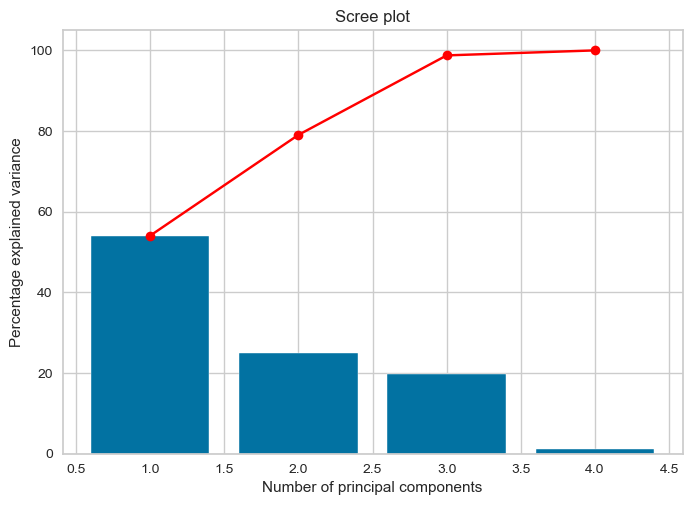

In [74]:
display_scree_plot(pca)

In [75]:
#### Factorial plane of PCA.

But can we visualize this negative influence or confirm it by the PC1 and PC2 from this model the most been a positive or for the gini a negative correlation between the variables?

Object `variables` not found.


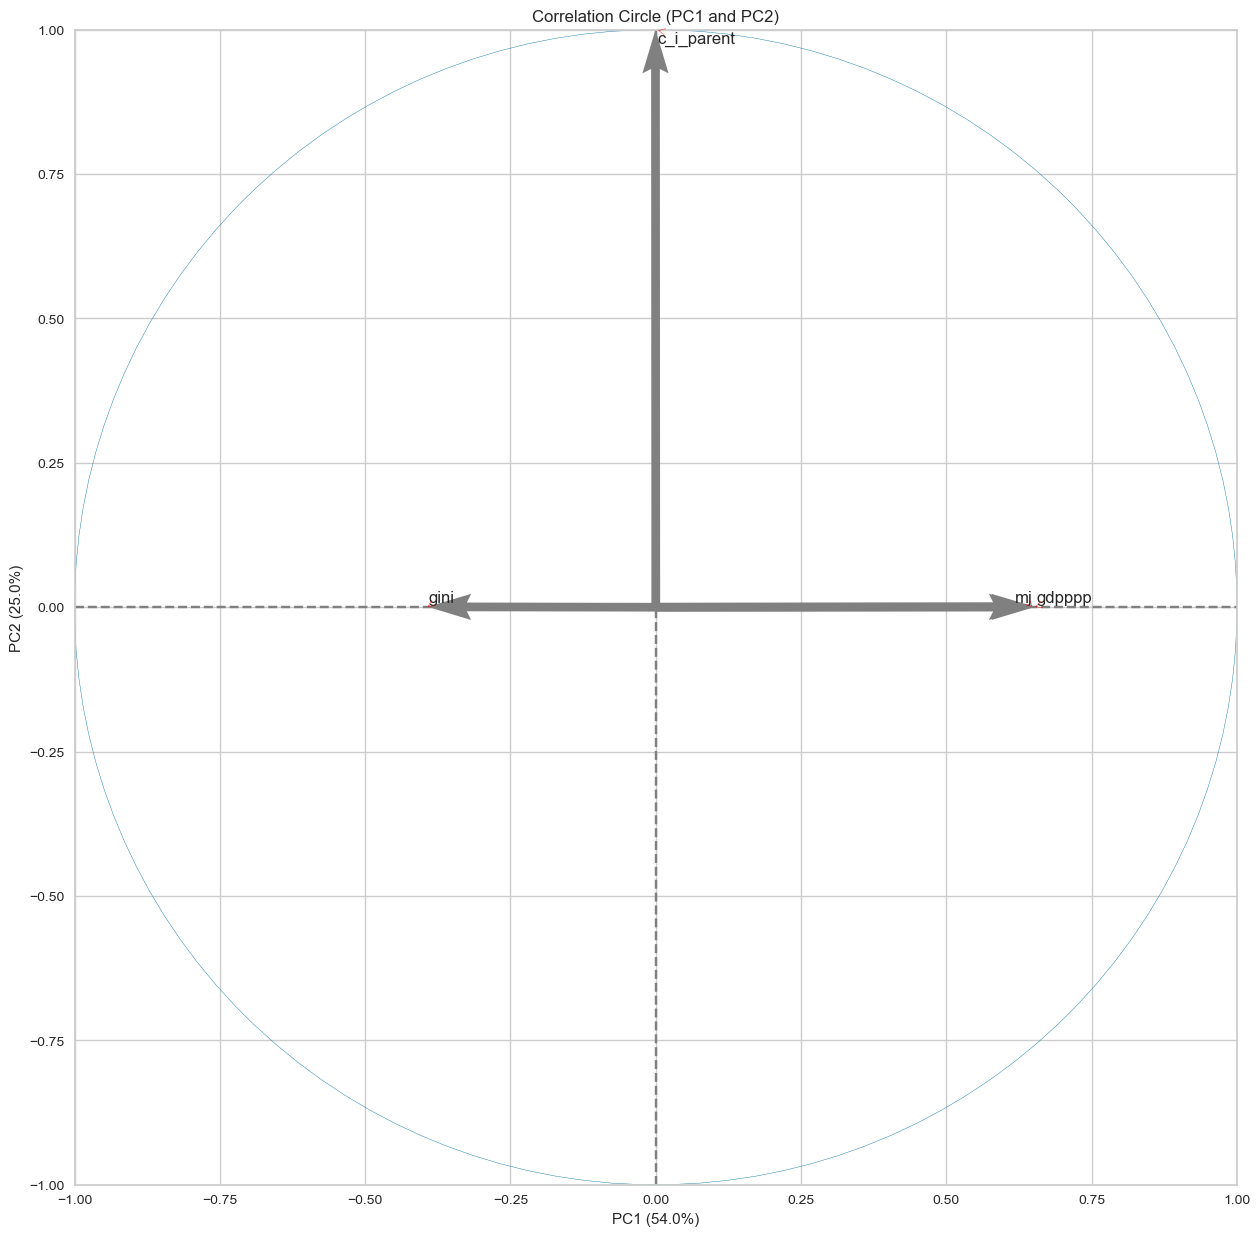

In [76]:
display_circles(pca.components_, pca.n_components, pca, [(0,1)], labels = df_model_data_numerical.columns, figsize=(15,15))

**Indeed, this clarifies that the gini is negatively correlated with the mean income and the gdpppp from any country, and now we also see why there is still an effect on the parent income**

The parent income is enough to correlate with all the influential variables; this could explain why we had a lower effect in our ANOVA complex table, as this effect is distributed from many variables and is not concentrated on a single one.

# Conclusion


We start from a simple model using ANOVA, observing if there is a statistically significant difference in the income caused by the countries!

Then we move to more complex models where the gini, gdppppp, and mean income are related to the income and find much influence.

Next, I answered two main questions based on linear regression; this gave again a hit of the value of a more complex model that is better than simple ones.

And we found how the gini negatively influences all the variables in question here.

After that, I did the same for a more complex model with gini, mean income, and c_i_parent related to income.

And at last, we could see why the variables influence each other by the correlation using the PCA components and plotting it on the factorial plane.

***What does this mean?***

From this analysis, the variable that most influence the income of any individual is the countries at first, then the gini, which also affects the gdpppp, mean income, and the parent income.

But can this analysis confirm the main questions in the research paper that parents and countries can be the major forces that influence the child's income?

**The answer is yes! This confirms what was found in the research paper. I quote it here:**

"In the base case (regression 1), the elasticity of own income with respect to the country's GDP per capita is 0.866. We can call this "the locational premium." The Gini coefficient enters with a negative sign, indicating that living in a more unequal country does, on average, reduce one's income.

One Gini point increase is associated with a 1.5 percent decrease in own income. This reflects the fact that higher inequality numerically benefits fewer people than it harms.15 Overall, these two circumstances explain 2/3 of the variability of individual percentile incomes across the world."

**To make it more clear, here is his final conclusion that I once again quote it here below:**

"As we shall see below, greater inequality has a differential impact depending on where one is in her country's distribution.

It benefits wealthier income classes (whose income goes up) and harms lower income classes (whose income declines). Overall, there are more of the latter, which is why the coefficient on Gini is negative in regressions such as (1)."

The variance here for the countries are for the counry is 70% and for the country with the parent income is 71% if Gdpppp is add we get to 90%.

So the values are closer to the ones from the research paper.

In [77]:
df_model_data.head()

,Unnamed: 0,country,c_i_child,income,gdpppp,mj,c_i_parent,gini
0,0,ALB,1,728.89795,7297.0,2994.829902,1.0,29.0
1,1,ALB,1,728.89795,7297.0,2994.829902,1.0,29.0
2,2,ALB,1,728.89795,7297.0,2994.829902,1.0,29.0
3,3,ALB,1,728.89795,7297.0,2994.829902,1.0,29.0
4,4,ALB,1,728.89795,7297.0,2994.829902,1.0,29.0
